# Disclaimer: This notebook was run using CDMS kernel V04-00

In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from qetpy.utils import lowpassfilter 
from qetpy import autocuts
import cdms
#from CDMSDataCatalog import CDMSDataCatalog
import scipy.optimize as optimize
import matplotlib as mpl

/cvmfs/cdms.opensciencegrid.org/releases/centos7/V04-00/lib/python3.7/site-packages/datacat/model.py:2: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import OrderedDict, MutableMapping


In [2]:
import pickle as pkl
import os, sys
import ROOT as rt

Welcome to JupyROOT 6.22/00


In [3]:
#Define processed files
#catalog = CDMSDataCatalog()
#print("Will search for data at ", catalog.default_fetchdir)

base="/sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.0/Submerged"
# series = {
#     'prebake' : '23231211_165227',
#     'postbake' : '23231213_115428'
# }

#Prompt_V04-15_P0.2.0_23231212_022833.root
# filePath = {
#     'prebake' : '%s/Prompt_V04-15_P0.2.0_%s.root'%(base,series['prebake']),
#     'postbake' : '%s/Prompt_V04-15_P0.2.0_%s.root'%(base,series['postbake'])
# }

series = {
    'LED_0_0_0' : '23231213_192731',
    'LED_50_0_0' : '23231213_211415',
    'LED_50_0_40' : '23231213_224943'
    
}
lname = {
    'LED_0_0_0' : 'LED 0 0 0',
    'LED_50_0_0' : 'LED 50 0 0',
    'LED_50_0_40' : 'LED 50 0 40'
}
filePath = {}
for key in series.keys():
    filePath[key] = '%s/Prompt_V04-15_P0.2.0_%s.root'%(base,series[key])
    print(key,' : ',filePath[key])


# series = {
#     'LED' : '23231213_192731'
# }

# filePath = {
#     'LED' : '%s/Prompt_V04-15_P0.2.0_%s.root'%(base,series['LED'])
# }

LED_0_0_0  :  /sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.0/Submerged/Prompt_V04-15_P0.2.0_23231213_192731.root
LED_50_0_0  :  /sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.0/Submerged/Prompt_V04-15_P0.2.0_23231213_211415.root
LED_50_0_40  :  /sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.0/Submerged/Prompt_V04-15_P0.2.0_23231213_224943.root


In [4]:
#Get RQs from processed files
### Older version #####
# RQ=[]
# for i in np.arange(9):
#     RQ.append(uproot.open(fetchresult[i].filePath)['rqDir/zip1']) 

# eventTree=[]
# for i in np.arange(9):
#     eventTree.append(uproot.open(fetchresult[i].filePath)['rqDir/eventTree']) 
##################################################################

dets = ['Z1','Z2','Z3']
RQ = []

for key in filePath.keys():
    t = {}
    for i,det in enumerate(dets):
        t[det] = uproot.open(filePath[key])['rqDir/zip%d'%(i+1)]
    RQ.append(t)

eventTree=[]
for key in filePath.keys():
    eventTree.append(uproot.open(filePath[key])['rqDir/eventTree']) 

# RQ=[]
# for i in np.arange(1):
#     RQ.append(uproot.open(filePath)['rqDir/zip1']) 

# eventTree=[]
# for i in np.arange(1):
#     eventTree.append(uproot.open(filePath)['rqDir/eventTree']) 

In [5]:
#Get RQs from processed files
#chan=['PBS2']
chan=['PT','PAS1','PBS1','PCS1','PDS1','PES1','PFS1','PAS2','PBS2','PCS2','PDS2','PES2','PFS2']
#series=['23231024_231640']
OFchiq={}
OFamps={}
OFdelay={}
OFamps0={}
OFnorms={}
bs={}
for i,key in enumerate(series.keys()): # for each series
    tc={}
    ta={}
    td={}
    ta0={}
    tn = {}
    tbs = {}
    for j,det in enumerate(dets):     # for each detector
        ttc={}
        tta={}
        ttd={}
        tta0={}
        ttn = {}
        ttbs = {}
        print('Detector = ',det)
        for c in chan:                # for each channel
            
            if(det == 'Z3' and c == 'PAS1'):
                print('\tSkipping Z3-PAS1...')
                continue
            print('\t chan = ',c)
            ttc[c]=(RQ[i][det].array(c+"OFchisq"))
            tta[c]=(RQ[i][det].array(c+"OFamps"))
            tta0[c]=(RQ[i][det].array(c+"OFamps0"))
            ttd[c]=(RQ[i][det].array(c+"OFdelay"))
            
            if(c!='PT'):
                tn[c] = (RQ[i][det].array(c+"norm"))
                ttbs[c]=(RQ[i][det].array(c+"bs"))
        tc[det] = ttc
        ta[det] = tta
        td[det] = ttd
        ta0[det] = tta0
        tn[det] = ttn
        tbs[det] = ttbs
    OFchiq[series[key]]=tc
    OFamps[series[key]]=ta
    OFamps0[series[key]]=ta0
    OFdelay[series[key]]=td
    bs[series[key]]=tbs
    OFnorms[series[key]]=tn
    
        
    print('Done for %s..'%(key))
print('all done')

Detector =  Z1
	 chan =  PT
	 chan =  PAS1
	 chan =  PBS1
	 chan =  PCS1
	 chan =  PDS1
	 chan =  PES1
	 chan =  PFS1
	 chan =  PAS2
	 chan =  PBS2
	 chan =  PCS2
	 chan =  PDS2
	 chan =  PES2
	 chan =  PFS2
Detector =  Z2
	 chan =  PT
	 chan =  PAS1
	 chan =  PBS1
	 chan =  PCS1
	 chan =  PDS1
	 chan =  PES1
	 chan =  PFS1
	 chan =  PAS2
	 chan =  PBS2
	 chan =  PCS2
	 chan =  PDS2
	 chan =  PES2
	 chan =  PFS2
Detector =  Z3
	 chan =  PT
	Skipping Z3-PAS1...
	 chan =  PBS1
	 chan =  PCS1
	 chan =  PDS1
	 chan =  PES1
	 chan =  PFS1
	 chan =  PAS2
	 chan =  PBS2
	 chan =  PCS2
	 chan =  PDS2
	 chan =  PES2
	 chan =  PFS2
Done for LED_0_0_0..
Detector =  Z1
	 chan =  PT
	 chan =  PAS1
	 chan =  PBS1
	 chan =  PCS1
	 chan =  PDS1
	 chan =  PES1
	 chan =  PFS1
	 chan =  PAS2
	 chan =  PBS2
	 chan =  PCS2
	 chan =  PDS2
	 chan =  PES2
	 chan =  PFS2
Detector =  Z2
	 chan =  PT
	 chan =  PAS1
	 chan =  PBS1
	 chan =  PCS1
	 chan =  PDS1
	 chan =  PES1
	 chan =  PFS1
	 chan =  PAS2
	 chan =

In [7]:
print('Calculate bs for PT...')
bs_pt = {}

for i,key in enumerate(series.keys()):
    
    for j,det in enumerate(dets):
        n = len(bs[series[key]][det]['PBS1'])
        if('PT' in bs[series[key]][det].keys()):
            del bs[series[key]][det]['PT']
        total_eventwise = []
        for ii in range(n):
            total = 0
            for k,c in enumerate(bs[series[key]][det].keys()):
                value = bs[series[key]][det][c][ii]
                if(value < -9999):
                    total = value
                    break
                else:
                    total += value
                #print('%s : %0.2f'%(c,value))
            #print('ii: total = %d : %0.3f'%(ii,total))
            total_eventwise.append(total)
        bs[series[key]][det]['PT'] = np.array(total_eventwise)
        #bs[series[key]][det]['PT'] = total_eventwise
        
            
            
        
print('Done...')

Calculate bs for PT...
Done...


In [8]:
TriggerTime=[]
TriggerType=[]
EventNumber=[]
TrigDet=[]
TriggerMask=[]
EventTime=[]
for i,key in enumerate(series.keys()):
    TriggerTime.append(eventTree[i].array("TriggerTime"))
    TriggerType.append(eventTree[i].array("TriggerType"))
    EventNumber.append(eventTree[i].array("EventNumber"))
    TrigDet.append(eventTree[i].array("TriggerDetectorNum"))
    TriggerMask.append(eventTree[i].array("TriggerMask"))
    EventTime.append(eventTree[i].array("EventTime"))
print('Done!')

Done!


In [39]:
np.sum(TrigDet[0] == 1)

2947

In [22]:
h_chi2_ofamp_pt = []
h_chi2_ofamp_pt_zoomed = []
h_ofamp_pt = []

for key in series.keys():
    th_chi2_ofamp_pt_zoomed = {}
    th_chi2_ofamp_pt = {}
    
    th_ofamp_pt = {}
    for i,det in enumerate(dets):
        hname = 'h_chi2_ofamp_pt_%s_%s_zoomed'%(det,key)
        htitle = 'chi^2 vs. Amp (%s, %s);Amplitude (uA);chi2'%(det,lname[key])
        tth2dzoomed = rt.TH2F(hname,htitle,100,0, 20,100,np.logspace(4.3, 6, 101))        
        th_chi2_ofamp_pt_zoomed[det] = tth2dzoomed
        
        hname = 'h_chi2_ofamp_pt_%s_%s'%(det,key)
        htitle = 'chi^2 vs. Amplitude (%s, %s);Amplitude (uA);chi^2'%(det,lname[key])
        tth2d = rt.TH2F(hname,htitle, 100,0, 100,100,np.logspace(4.3, 7, 101))
        th_chi2_ofamp_pt[det] = tth2d
        
        hname = 'h_ofamp_pt_%s_%s'%(det,key)
        htitle = '%s, %s (chi2 < 5e4 & 1 < ofamp < 2)'%(det, lname[key])
        tth1d = rt.TH1F(hname,htitle,200,0.5,2.5)
        th_ofamp_pt[det] = tth1d
        
    h_chi2_ofamp_pt.append(th_chi2_ofamp_pt)
    h_chi2_ofamp_pt_zoomed.append(th_chi2_ofamp_pt_zoomed)
    h_ofamp_pt.append(th_ofamp_pt)




In [23]:
chan = 'PT'
idx = 0
det = 'Z2'
key = list(series.keys())[idx]
mask = (TriggerType[idx] == 1) & (OFamps[series[key]][det][chan] > 0.) & (TrigDet[idx] == 2)
x = OFamps[series[key]][det][chan][mask]*1e6
y = OFchiq[series[key]][det][chan][mask]

for j in range(len(x)):
    h_chi2_ofamp_pt[idx][det].Fill(x[j],y[j])
    h_chi2_ofamp_pt_zoomed[idx][det].Fill(x[j],y[j])
#     if((x[j] < 2) and (x[j] > 1) and (y[j] < 5e4)):
#         h_ofamp_pt[idx][det].Fill(x[j])


In [18]:
series.keys()

dict_keys(['LED_0_0_0', 'LED_50_0_40'])

In [11]:
can = rt.TCanvas()
can.SetLogy()
rt.gStyle.SetOptStat(0)
can.SetLogz()

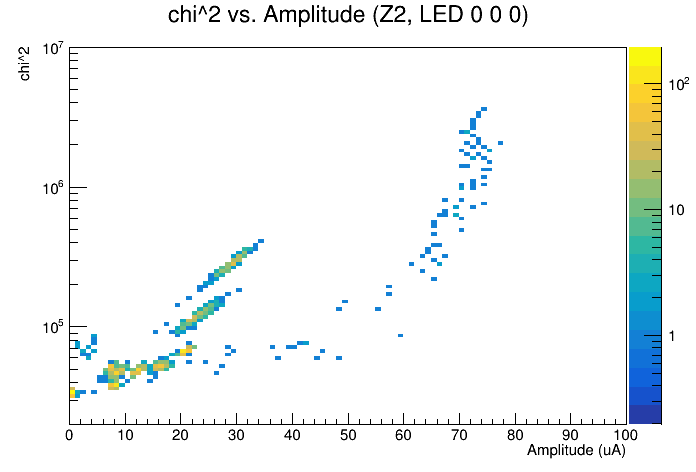

In [24]:
h_chi2_ofamp_pt[0]['Z2'].Draw('colz')
can.Draw()

In [31]:
chan = 'PT'
idx = 1
det = 'Z2'
key = list(series.keys())[idx]
mask = (TriggerType[idx] == 1) & (OFamps[series[key]][det][chan] > 0.) & (TrigDet[idx] == 2)
x = OFamps[series[key]][det][chan][mask]*1e6
y = OFchiq[series[key]][det][chan][mask]

for j in range(len(x)):
    h_chi2_ofamp_pt[idx][det].Fill(x[j],y[j])
    h_chi2_ofamp_pt_zoomed[idx][det].Fill(x[j],y[j])
#     if((x[j] < 2) and (x[j] > 1) and (y[j] < 5e4)):
#         h_ofamp_pt[idx][det].Fill(x[j])

In [30]:
list(series.keys())

['LED_0_0_0', 'LED_50_0_40']

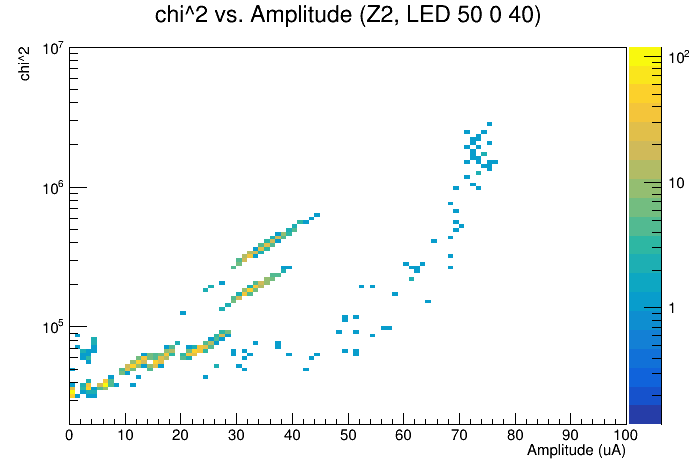

In [32]:
h_chi2_ofamp_pt[1]['Z2'].Draw('colz')
can.Draw()

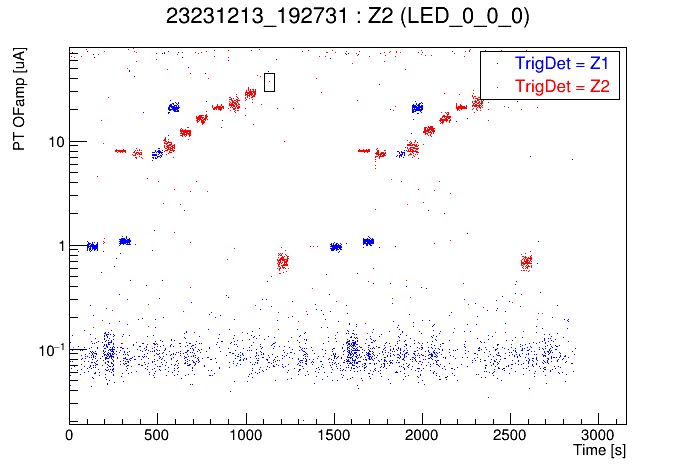

In [97]:
#gr_amp_t = rt.TGraph('gr_amp_t','gr_amp_t',0,10e3)
chan = 'PT'
idx = 0
key = list(series.keys())[idx]
det = 'Z2'
marker_color = [rt.kBlue, rt.kRed, rt.kBlack]
lname = ['TrigDet = Z1','TrigDet = Z2','TrigDet = Z3']
graphs = []

for i in range(1,4):
    mask = (TriggerType[idx] == 1) & (OFamps[series[key]][det][chan] > 0.) & (EventTime[idx] > 0.) & (TrigDet[idx] == i)
    if(np.sum(mask) == 0):
        continue
    t0 = EventTime[idx][mask][0]
    x = EventTime[idx][mask] - t0
    y = OFamps[series[key]][det][chan][mask]*1e6
    gr_amp_t = rt.TGraph(len(x),x,y)
    gr_amp_t.SetMarkerColor(marker_color[i-1])
    gr_amp_t.SetTitle('%s : %s (%s)'%(series[key],det,key) )
    gr_amp_t.GetXaxis().SetTitle('Time [s]')
    gr_amp_t.GetYaxis().SetTitle('PT OFamp [uA]')
    graphs.append(gr_amp_t)

l = rt.TLegend(0.69, 0.89, 0.89, 0.79) # x,y of top left and x,y of bottom right
#l = rt.TLegend(0.2, 0.75, 0.4, 0.85)
for i,gr in enumerate(graphs):
    ll = l.AddEntry(gr, lname[i], 'p')
    ll.SetTextColor(gr.GetMarkerColor())
    if(i==0):
        gr.GetXaxis().SetRangeUser(0,3500)
        
        gr.Draw('AP')
    else:
        gr.Draw('P same')
    
can.SetLogy()
l.Draw()

t1 = 1103
t2 = 1163
a1 = 30
a2 = 45
lh1 = rt.TLine(t1,a1,t2,a1)
lh2 = rt.TLine(t1,a2,t2,a2)
lv1 = rt.TLine(t1,a1,t1,a2)
lv2 = rt.TLine(t2,a1,t2,a2)
lh1.Draw()
lh2.Draw()
lv1.Draw()
lv2.Draw()

can.Draw()
# print(len(x))
# print(len(y))

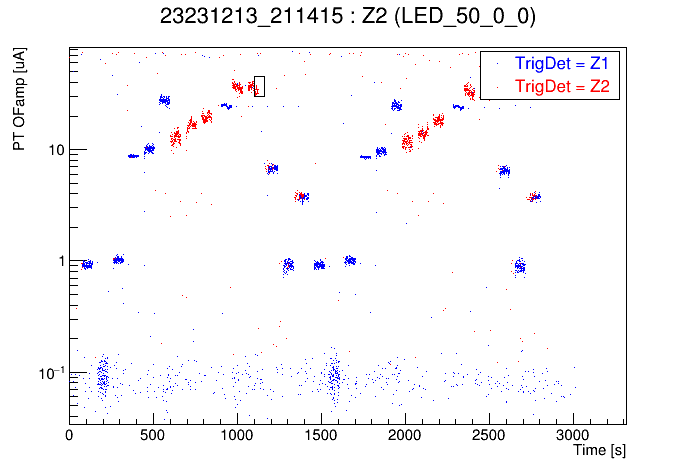

In [96]:
#gr_amp_t = rt.TGraph('gr_amp_t','gr_amp_t',0,10e3)
chan = 'PT'
idx = 1
key = list(series.keys())[idx]
det = 'Z2'
marker_color = [rt.kBlue, rt.kRed, rt.kBlack]
lname = ['TrigDet = Z1','TrigDet = Z2','TrigDet = Z3']
graphs = []

for i in range(1,4):
    mask = (TriggerType[idx] == 1) & (OFamps[series[key]][det][chan] > 0.) & (EventTime[idx] > 0.) & (TrigDet[idx] == i)
    if(np.sum(mask) == 0):
        continue
    t0 = EventTime[idx][mask][0]
    x = EventTime[idx][mask] - t0
    y = OFamps[series[key]][det][chan][mask]*1e6
    gr_amp_t = rt.TGraph(len(x),x,y)
    gr_amp_t.SetMarkerColor(marker_color[i-1])
    gr_amp_t.SetTitle('%s : %s (%s)'%(series[key],det,key) )
    gr_amp_t.GetXaxis().SetTitle('Time [s]')
    gr_amp_t.GetYaxis().SetTitle('PT OFamp [uA]')
    graphs.append(gr_amp_t)

l = rt.TLegend(0.69, 0.89, 0.89, 0.79) # x,y of top left and x,y of bottom right
#l = rt.TLegend(0.2, 0.75, 0.4, 0.85)
for i,gr in enumerate(graphs):
    ll = l.AddEntry(gr, lname[i], 'p')
    ll.SetTextColor(gr.GetMarkerColor())
    if(i==0):
        gr.GetXaxis().SetRangeUser(0,3500)
        
        gr.Draw('AP')
    else:
        gr.Draw('P same')
    
can.SetLogy()


l.Draw()

t1 = 1103
t2 = 1163
a1 = 30
a2 = 45
lh1 = rt.TLine(t1,a1,t2,a1)
lh2 = rt.TLine(t1,a2,t2,a2)
lv1 = rt.TLine(t1,a1,t1,a2)
lv2 = rt.TLine(t2,a1,t2,a2)
lh1.Draw()
lh2.Draw()
lv1.Draw()
lv2.Draw()

can.Draw()
# print(len(x))
# print(len(y))

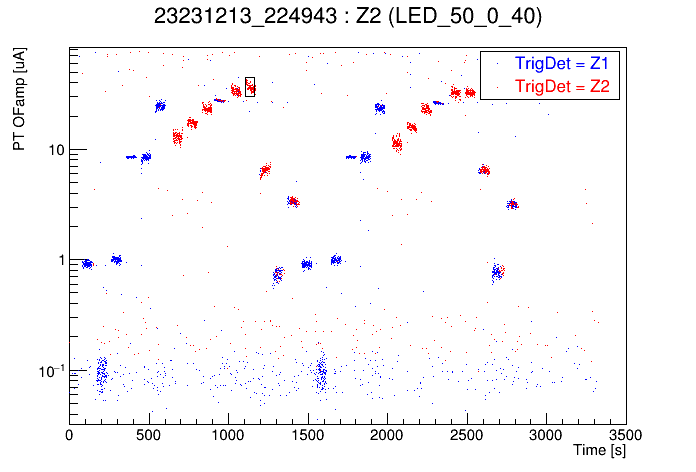

In [95]:
#gr_amp_t = rt.TGraph('gr_amp_t','gr_amp_t',0,10e3)
chan = 'PT'
idx = 2
key = list(series.keys())[idx]
det = 'Z2'
marker_color = [rt.kBlue, rt.kRed, rt.kBlack]
lname = ['TrigDet = Z1','TrigDet = Z2','TrigDet = Z3']
graphs = []

for i in range(1,4):
    mask = (TriggerType[idx] == 1) & (OFamps[series[key]][det][chan] > 0.) & (EventTime[idx] > 0.) & (TrigDet[idx] == i)
    if(np.sum(mask) == 0):
        continue
    t0 = EventTime[idx][mask][0]
    x = EventTime[idx][mask] - t0
    y = OFamps[series[key]][det][chan][mask]*1e6
    gr_amp_t = rt.TGraph(len(x),x,y)
    gr_amp_t.SetMarkerColor(marker_color[i-1])
    gr_amp_t.SetTitle('%s : %s (%s)'%(series[key],det,key) )
    gr_amp_t.GetXaxis().SetTitle('Time [s]')
    gr_amp_t.GetYaxis().SetTitle('PT OFamp [uA]')
    graphs.append(gr_amp_t)

l = rt.TLegend(0.69, 0.89, 0.89, 0.79) # x,y of top left and x,y of bottom right
#l = rt.TLegend(0.2, 0.75, 0.4, 0.85)
for i,gr in enumerate(graphs):
    ll = l.AddEntry(gr, lname[i], 'p')
    ll.SetTextColor(gr.GetMarkerColor())
    if(i==0):
        gr.GetXaxis().SetRangeUser(0,3500)
        
        gr.Draw('AP')
    else:
        gr.Draw('P same')
    
can.SetLogy()
l.Draw()


t1 = 1103
t2 = 1163
a1 = 30
a2 = 45
lh1 = rt.TLine(t1,a1,t2,a1)
lh2 = rt.TLine(t1,a2,t2,a2)
lv1 = rt.TLine(t1,a1,t1,a2)
lv2 = rt.TLine(t2,a1,t2,a2)
lh1.Draw()
lh2.Draw()
lv1.Draw()
lv2.Draw()

can.Draw()
# print(len(x))
# print(len(y))

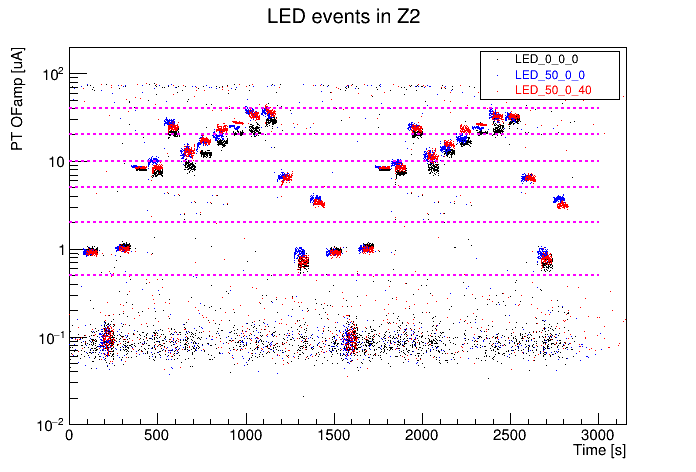

In [12]:
#gr_amp_t = rt.TGraph('gr_amp_t','gr_amp_t',0,10e3)
chan = 'PT'
idx = 2
key = list(series.keys())[idx]
det = 'Z2'
marker_color = [rt.kBlue, rt.kRed, rt.kBlack]
lname = ['TrigDet = Z1','TrigDet = Z2','TrigDet = Z3']
graphs = []

for idx,key in enumerate(series.keys()):
    #if()
    mask = (TriggerType[idx] == 1) & (OFamps[series[key]][det][chan] > 0.) & (EventTime[idx] > 0.) & (TrigDet[idx] == 1) | (TrigDet[idx] == 2)
    if(np.sum(mask) == 0):
        continue
    t0 = EventTime[idx][mask][0]
    x = EventTime[idx][mask] - t0
    y = OFamps[series[key]][det][chan][mask]*1e6
    gr_amp_t = rt.TGraph(len(x),x,y)
    gr_amp_t.SetMarkerColor(marker_color[idx-1])
    gr_amp_t.SetTitle('%s : %s (%s)'%(series[key],det,key) )
    gr_amp_t.GetXaxis().SetTitle('Time [s]')
    gr_amp_t.GetYaxis().SetTitle('PT OFamp [uA]')
    graphs.append(gr_amp_t)

l = rt.TLegend(0.69, 0.89, 0.89, 0.79) # x,y of top left and x,y of bottom right
#l = rt.TLegend(0.2, 0.75, 0.4, 0.85)
for i,gr in enumerate(graphs):
    ll = l.AddEntry(gr, list(series.keys())[i], 'p')
    ll.SetTextColor(gr.GetMarkerColor())
    if(i==0):
        gr.GetXaxis().SetRangeUser(0,3500)
        gr.GetYaxis().SetRangeUser(1e-2,2e2)
        #gr.GetYaxis().SetRangeUser(0,50)
        gr.SetTitle('LED events in Z2')
        
        gr.Draw('AP')
    else:
        gr.Draw('P same')
    
can.SetLogy()
l.Draw()


t1 = 0
t2 = 3000
a1 = 0.5
a2 = 2
a3 = 5
a4 = 10
a5 = 20
a6 = 40
lh1 = rt.TLine(t1,a1,t2,a1)
lh1.SetLineColor(rt.kMagenta)
lh1.SetLineWidth(2)
lh1.SetLineStyle(2)

lh2 = rt.TLine(t1,a2,t2,a2)
lh2.SetLineColor(rt.kMagenta)
lh2.SetLineWidth(2)
lh2.SetLineStyle(2)

lh3 = rt.TLine(t1,a3,t2,a3)
lh3.SetLineColor(rt.kMagenta)
lh3.SetLineWidth(2)
lh3.SetLineStyle(2)

lh4 = rt.TLine(t1,a4,t2,a4)
lh4.SetLineColor(rt.kMagenta)
lh4.SetLineWidth(2)
lh4.SetLineStyle(2)

lh5 = rt.TLine(t1,a5,t2,a5)
lh5.SetLineColor(rt.kMagenta)
lh5.SetLineWidth(2)
lh5.SetLineStyle(2)

lh6 = rt.TLine(t1,a6,t2,a6)
lh6.SetLineColor(rt.kMagenta)
lh6.SetLineWidth(2)
lh6.SetLineStyle(2)

lh1.Draw()
lh2.Draw()
lh3.Draw()
lh4.Draw()
lh5.Draw()
lh6.Draw()
# lv1.Draw()
# lv2.Draw()
can.SetLogy()
can.Draw()
# print(len(x))
# print(len(y))

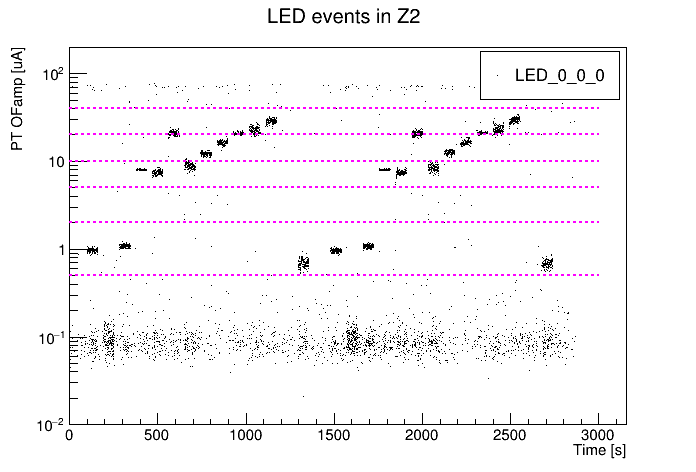

In [15]:
#gr_amp_t = rt.TGraph('gr_amp_t','gr_amp_t',0,10e3)
chan = 'PT'
idx = 2
key = list(series.keys())[idx]
det = 'Z2'
marker_color = [rt.kBlue, rt.kRed, rt.kBlack]
lname = ['TrigDet = Z1','TrigDet = Z2','TrigDet = Z3']
graphs = []

for idx,key in enumerate(series.keys()):
    if(idx != 0):
        continue
    mask = (TriggerType[idx] == 1) & (OFamps[series[key]][det][chan] > 0.) & (EventTime[idx] > 0.) & (TrigDet[idx] == 1) | (TrigDet[idx] == 2)
    if(np.sum(mask) == 0):
        continue
    t0 = EventTime[idx][mask][0]
    x = EventTime[idx][mask] - t0
    y = OFamps[series[key]][det][chan][mask]*1e6
    gr_amp_t = rt.TGraph(len(x),x,y)
    gr_amp_t.SetMarkerColor(marker_color[idx-1])
    gr_amp_t.SetTitle('%s : %s (%s)'%(series[key],det,key) )
    gr_amp_t.GetXaxis().SetTitle('Time [s]')
    gr_amp_t.GetYaxis().SetTitle('PT OFamp [uA]')
    graphs.append(gr_amp_t)

l = rt.TLegend(0.69, 0.89, 0.89, 0.79) # x,y of top left and x,y of bottom right
#l = rt.TLegend(0.2, 0.75, 0.4, 0.85)
for i,gr in enumerate(graphs):
    if(i !=0):
        continue
    ll = l.AddEntry(gr, list(series.keys())[i], 'p')
    ll.SetTextColor(gr.GetMarkerColor())
    if(i==0):
        gr.GetXaxis().SetRangeUser(0,3500)
        gr.GetYaxis().SetRangeUser(1e-2,2e2)
        #gr.GetYaxis().SetRangeUser(0,50)
        gr.SetTitle('LED events in Z2')
        
        gr.Draw('AP')
    else:
        gr.Draw('P same')
    
can.SetLogy()
l.Draw()


t1 = 0
t2 = 3000
a1 = 0.5
a2 = 2
a3 = 5
a4 = 10
a5 = 20
a6 = 40
lh1 = rt.TLine(t1,a1,t2,a1)
lh1.SetLineColor(rt.kMagenta)
lh1.SetLineWidth(2)
lh1.SetLineStyle(2)

lh2 = rt.TLine(t1,a2,t2,a2)
lh2.SetLineColor(rt.kMagenta)
lh2.SetLineWidth(2)
lh2.SetLineStyle(2)

lh3 = rt.TLine(t1,a3,t2,a3)
lh3.SetLineColor(rt.kMagenta)
lh3.SetLineWidth(2)
lh3.SetLineStyle(2)

lh4 = rt.TLine(t1,a4,t2,a4)
lh4.SetLineColor(rt.kMagenta)
lh4.SetLineWidth(2)
lh4.SetLineStyle(2)

lh5 = rt.TLine(t1,a5,t2,a5)
lh5.SetLineColor(rt.kMagenta)
lh5.SetLineWidth(2)
lh5.SetLineStyle(2)

lh6 = rt.TLine(t1,a6,t2,a6)
lh6.SetLineColor(rt.kMagenta)
lh6.SetLineWidth(2)
lh6.SetLineStyle(2)

lh1.Draw()
lh2.Draw()
lh3.Draw()
lh4.Draw()
lh5.Draw()
lh6.Draw()
# lv1.Draw()
# lv2.Draw()
can.SetLogy()
can.Draw()
# print(len(x))
# print(len(y))

In [109]:
series

{'LED_0_0_0': '23231213_192731',
 'LED_50_0_0': '23231213_211415',
 'LED_50_0_40': '23231213_224943'}

In [155]:
# hist_cuts = {
#     'r1' : [],
#     'r2' : [],
#     'r3' : [],
#     'r4' : [],
#     'r5' : []
# }
# a1 = 0.5
# a2 = 2
# a3 = 5
# a4 = 10
# a5 = 20
# a6 = 40
cuts = {
    'r1' : [0.5, 2.],
    'r2' : [2., 5.],
    'r3' : [5., 10.],
    'r4' : [10., 20.],
    'r5' : [20., 40.]
}
xrange = {
    'r1' : [0, 2.5],
    'r2' : [1.5, 5.5],
    'r3' : [4., 11.],
    'r4' : [8., 22.],
    'r5' : [15., 45.]
}
xbins = {
    'r1' : 250,
    'r2' : 400,
    'r3' : 140,
    'r4' : 140,
    'r5' : 200,
}
# hist_cuts = {
#     'LED_0_0_0' : {},
#     'LED_50_0_0' : {},
#     'LED_50_0_40' : {}
# }
hist_cuts = {}
det = 'Z2'
chan = 'PT'
for idx,key in enumerate(series.keys()):
    t_h = {}
    for j,cut in enumerate(cuts.keys()):
        hname = 'h_LED_Z2_%s_%s'%(key,cut)
        htitle = 'Z2 %s (%0.1f < OFAmp [uA] < %0.1f)'%(key,(cuts[cut])[0],(cuts[cut])[1])
        xmin = (xrange[cut])[0]
        xmax = (xrange[cut])[1]
        xbin = xbins[cut]
        temp = rt.TH1F(hname,htitle,xbin, xmin, xmax)
        cutlow = cuts[cut][0]*1e-6
        cuthigh = cuts[cut][1]*1e-6
        mask = (TriggerType[idx] == 1) & (OFamps[series[key]][det][chan] > 0.) & ((TrigDet[idx] == 1) | (TrigDet[idx] == 2))
        mask = mask & (OFamps[series[key]][det][chan] > cutlow) & (OFamps[series[key]][det][chan] < cuthigh)
        x = OFamps[series[key]][det][chan][mask]*1e6
        #print('%s : %s : %d'%(key,cut,(len(x))))
#         print('%s : %s : %d'%(key,cut,np.sum(mask)))
#         break
        for k in range(len(x)):
            temp.Fill(x[k])
        t_h[cut] = temp
    hist_cuts[key] = t_h
    print('\t %d : %s '%(idx, key))
print('Done...')      

	 0 : LED_0_0_0 
	 1 : LED_50_0_0 
	 2 : LED_50_0_40 
Done...


In [117]:
hist_cuts

{'LED_0_0_0': {'r1': <cppyy.gbl.TH1F object at 0xacb0ab0>,
  'r2': <cppyy.gbl.TH1F object at 0x7a9c450>,
  'r3': <cppyy.gbl.TH1F object at 0xacafe80>,
  'r4': <cppyy.gbl.TH1F object at 0xc4ab6c0>,
  'r5': <cppyy.gbl.TH1F object at 0xa4e8ef0>},
 'LED_50_0_0': {'r1': <cppyy.gbl.TH1F object at 0xc4ac4e0>,
  'r2': <cppyy.gbl.TH1F object at 0xc4acb10>,
  'r3': <cppyy.gbl.TH1F object at 0xacb0ea0>,
  'r4': <cppyy.gbl.TH1F object at 0xacb15e0>,
  'r5': <cppyy.gbl.TH1F object at 0xacb1e30>},
 'LED_50_0_40': {'r1': <cppyy.gbl.TH1F object at 0xc4b93d0>,
  'r2': <cppyy.gbl.TH1F object at 0xc4b9a60>,
  'r3': <cppyy.gbl.TH1F object at 0xc4ba120>,
  'r4': <cppyy.gbl.TH1F object at 0xc4ba800>,
  'r5': <cppyy.gbl.TH1F object at 0xc4bafe0>}}

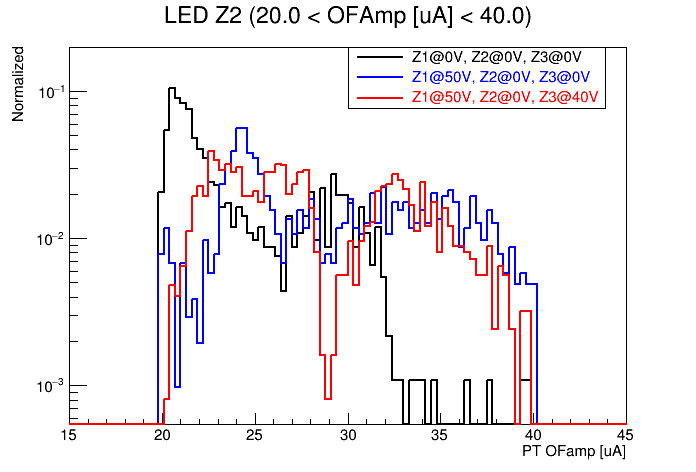

In [185]:
cut = 'r5'
marker_color = [rt.kBlue, rt.kRed, rt.kBlack]
legend_name = ['Z1@0V, Z2@0V, Z3@0V', 'Z1@50V, Z2@0V, Z3@0V', 'Z1@50V, Z2@0V, Z3@40V']

hist_toPlot = []
for idx,key in enumerate(series.keys()):
    temp = hist_cuts[key][cut].Clone()
    temp.Scale(1.0/temp.Integral())
    temp.Rebin(2)
    temp.SetLineColor(marker_color[idx-1])
    temp.SetLineStyle(1)
    temp.SetLineWidth(2)
    temp.SetTitle('LED Z2 (%0.1f < OFAmp [uA] < %0.1f)'%((cuts[cut])[0],(cuts[cut])[1]))
    temp.GetXaxis().SetTitle('PT OFamp [uA]')
    temp.GetYaxis().SetTitle('Normalized')
    hist_toPlot.append(temp)

x1 = 0.5
x2 = 0.87
y1 = 0.9
y2 = 0.77

if(cut == 'r3'):
    x1 = 0.12
    x2 = 0.49
l = rt.TLegend(x1, y1, x2, y2) # x,y of top left and x,y of bottom right
l.SetTextSize(0.035)
lentries = []
for idx,key in enumerate(series.keys()):
    lentries.append(l.AddEntry(hist_toPlot[idx],legend_name[idx],'l'))
    lentries[idx].SetTextColor(hist_toPlot[idx].GetLineColor())
    if(idx == 0):
        hist_toPlot[idx].Draw('hist')
    else:
        hist_toPlot[idx].Draw('hist same')
        
l.Draw()
can.Draw()


In [179]:
a = [1,2,3,4]
*a

SyntaxError: can't use starred expression here (<ipython-input-179-fe88455b7915>, line 5)

In [129]:
# hist_cuts['LED_0_0_0']['r2'].Draw()
# can.Draw()

for key in series.keys():
    for cut in cuts.keys():
        print('%s : %s : %d'%(key,cut,hist_cuts[key][cut].GetEntries()))

LED_0_0_0 : r1 : 764
LED_0_0_0 : r2 : 20
LED_0_0_0 : r3 : 724
LED_0_0_0 : r4 : 583
LED_0_0_0 : r5 : 921
LED_50_0_0 : r1 : 750
LED_50_0_0 : r2 : 265
LED_50_0_0 : r3 : 648
LED_50_0_0 : r4 : 779
LED_50_0_0 : r5 : 1032
LED_50_0_40 : r1 : 754
LED_50_0_40 : r2 : 268
LED_50_0_40 : r3 : 740
LED_50_0_40 : r4 : 480
LED_50_0_40 : r5 : 1247


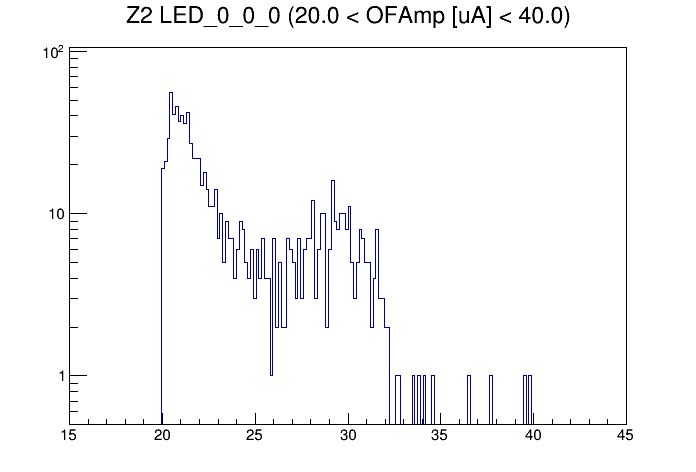

In [158]:
hist_cuts['LED_0_0_0']['r5'].Draw()
can.Draw()

In [115]:
idx = 0
key = 'LED_0_0_0'
det = 'Z2'
chan = 'PT'
(TriggerType[idx] == 1) & (OFamps[series[key]][det][chan] > 0.) & ((TrigDet[idx] == 1) | (TrigDet[idx] == 2))

array([False, False, False, ...,  True, False, False])

In [ ]:
lname = {
    'LED_0_0_0' : 'LED 0 0 0',
    'LED_50_0_40' : 'LED 50 0 40'
}

chan = 'PT'
idx = 0
det = 'Z2'
key = list(series.keys())[idx]

h_ofamp_pt_LEDpeak = []

hname = 'h_ofamp_pt_%s_%s'%(det,key)
htitle = '%s, %s (900 < reltime [s] < 1100 & 10 < ofamp < 40)'%(det, lname[key])
tth1d = rt.TH1F(hname,htitle,300,10,40)
h_ofamp_pt_LEDpeak.append(tth1d)

mask = (TriggerType[idx] == 1) & (OFamps[series[key]][det][chan] > 0.) & (TrigDet[idx] == 2)
t0 = EventTime[idx][mask][0]
reltime = EventTime[idx][mask] - t0
x = OFamps[series[key]][det][chan][mask]*1e6
y = OFchiq[series[key]][det][chan][mask]

for j in range(len(x)):
    if(reltime[j] > 900 and reltime[j] < 1100):
        h_ofamp_pt_LEDpeak[idx].Fill(x[j])

print('First series done...')       
chan = 'PT'
idx = 1
det = 'Z2'
key = list(series.keys())[idx]


hname = 'h_ofamp_pt_%s_%s'%(det,key)
htitle = '%s, %s (900 < reltime [s] < 1100 & 10 < ofamp < 40)'%(det, lname[key])
tth1d = rt.TH1F(hname,htitle,300,10,40)
h_ofamp_pt_LEDpeak.append(tth1d)

mask = (TriggerType[idx] == 1) & (OFamps[series[key]][det][chan] > 0.) & (TrigDet[idx] == 2)
t0 = EventTime[idx][mask][0]
reltime = EventTime[idx][mask] - t0
x = OFamps[series[key]][det][chan][mask]*1e6
y = OFchiq[series[key]][det][chan][mask]

for j in range(len(x)):
    if(reltime[j] > 900 and reltime[j] < 1100):
        h_ofamp_pt_LEDpeak[idx].Fill(x[j])
print('Second series done...')  

# Zoomed

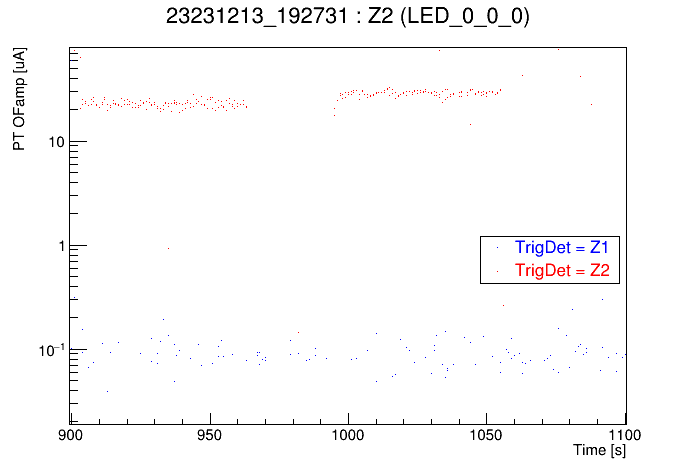

In [53]:
#gr_amp_t = rt.TGraph('gr_amp_t','gr_amp_t',0,10e3)
chan = 'PT'
key = 'LED_0_0_0'
det = 'Z2'
marker_color = [rt.kBlue, rt.kRed, rt.kBlack]
lname = ['TrigDet = Z1','TrigDet = Z2','TrigDet = Z3']
graphs = []
idx = 0
for i in range(1,4):
    mask = (TriggerType[idx] == 1) & (OFamps[series[key]][det][chan] > 0.) & (EventTime[idx] > 0.) & (TrigDet[idx] == i)
    if(np.sum(mask) == 0):
        continue
    t0 = EventTime[idx][mask][0]
    x = EventTime[idx][mask] - t0
    y = OFamps[series[key]][det][chan][mask]*1e6
    gr_amp_t = rt.TGraph(len(x),x,y)
    gr_amp_t.SetMarkerColor(marker_color[i-1])
    gr_amp_t.SetTitle('%s : %s (%s)'%(series[key],det,key) )
    gr_amp_t.GetXaxis().SetTitle('Time [s]')
    gr_amp_t.GetYaxis().SetTitle('PT OFamp [uA]')
    gr_amp_t.GetXaxis().SetRangeUser(900,1100)
    graphs.append(gr_amp_t)

l = rt.TLegend(0.69, 0.5, 0.89, 0.4) # x,y of top left and x,y of bottom right
#l = rt.TLegend(0.2, 0.75, 0.4, 0.85)
for i,gr in enumerate(graphs):
    ll = l.AddEntry(gr, lname[i], 'p')
    ll.SetTextColor(gr.GetMarkerColor())
    if(i==0):
        #gr.GetXaxis().SetRangeUser(0,3500)
        
        gr.Draw('AP')
    else:
        gr.Draw('P same')
    
can.SetLogy()
l.Draw()
can.Draw()
# print(len(x))
# print(len(y))

In [59]:
lname = {
    'LED_0_0_0' : 'LED 0 0 0',
    'LED_50_0_40' : 'LED 50 0 40'
}

chan = 'PT'
idx = 0
det = 'Z2'
key = list(series.keys())[idx]

h_ofamp_pt_LEDpeak = []

hname = 'h_ofamp_pt_%s_%s'%(det,key)
htitle = '%s, %s (900 < reltime [s] < 1100 & 10 < ofamp < 40)'%(det, lname[key])
tth1d = rt.TH1F(hname,htitle,300,10,40)
h_ofamp_pt_LEDpeak.append(tth1d)

mask = (TriggerType[idx] == 1) & (OFamps[series[key]][det][chan] > 0.) & (TrigDet[idx] == 2)
t0 = EventTime[idx][mask][0]
reltime = EventTime[idx][mask] - t0
x = OFamps[series[key]][det][chan][mask]*1e6
y = OFchiq[series[key]][det][chan][mask]

for j in range(len(x)):
    if(reltime[j] > 900 and reltime[j] < 1100):
        h_ofamp_pt_LEDpeak[idx].Fill(x[j])

print('First series done...')       
chan = 'PT'
idx = 1
det = 'Z2'
key = list(series.keys())[idx]


hname = 'h_ofamp_pt_%s_%s'%(det,key)
htitle = '%s, %s (900 < reltime [s] < 1100 & 10 < ofamp < 40)'%(det, lname[key])
tth1d = rt.TH1F(hname,htitle,300,10,40)
h_ofamp_pt_LEDpeak.append(tth1d)

mask = (TriggerType[idx] == 1) & (OFamps[series[key]][det][chan] > 0.) & (TrigDet[idx] == 2)
t0 = EventTime[idx][mask][0]
reltime = EventTime[idx][mask] - t0
x = OFamps[series[key]][det][chan][mask]*1e6
y = OFchiq[series[key]][det][chan][mask]

for j in range(len(x)):
    if(reltime[j] > 900 and reltime[j] < 1100):
        h_ofamp_pt_LEDpeak[idx].Fill(x[j])
print('Second series done...')  

First series done...
Second series done...


Warning in <TROOT::Append>: Replacing existing TH1: h_ofamp_pt_Z2_LED_0_0_0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_ofamp_pt_Z2_LED_50_0_40 (Potential memory leak).


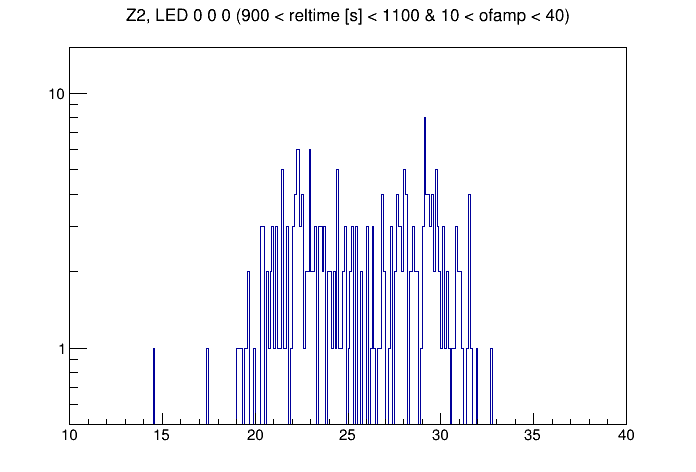

In [60]:
h_ofamp_pt_LEDpeak[0].Draw()
can.Draw()

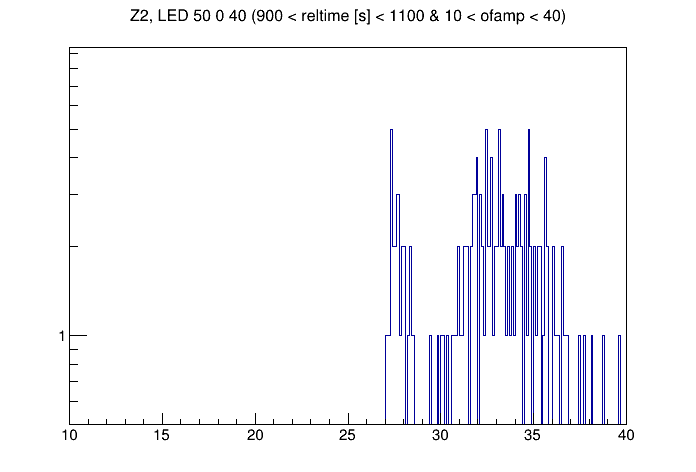

In [61]:
h_ofamp_pt_LEDpeak[1].Draw()
can.Draw()

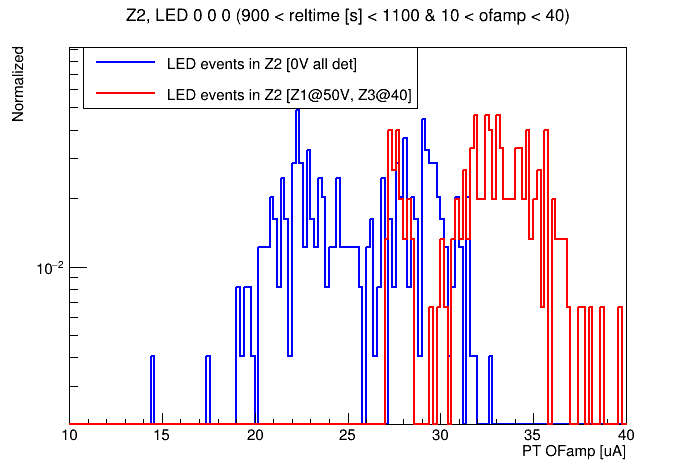

In [72]:
h_0V = h_ofamp_pt_LEDpeak[0].Clone()
h_HV = h_ofamp_pt_LEDpeak[1].Clone()
h_0V.Scale(1./h_0V.Integral())
h_0V.Rebin(2)
h_0V.SetLineColor(rt.kBlue)
h_0V.SetLineStyle(1)
h_0V.SetLineWidth(2)
#h_0V.SetTitle("")
h_0V.GetXaxis().SetTitle('PT OFamp [uA]')
h_0V.GetYaxis().SetTitle('Normalized')

h_HV.Scale(1./h_HV.Integral())
h_HV.Rebin(2)
h_HV.SetLineColor(rt.kRed)
h_HV.SetLineStyle(1)
h_HV.SetLineWidth(2)
#h_HV.SetTitle("")
h_HV.GetXaxis().SetTitle('PT OFamp [uA]')
h_HV.GetYaxis().SetTitle('Normalized')


h_0V.Draw('hist')
h_HV.Draw('hist same')

l = rt.TLegend(0.12, 0.9, 0.6, 0.77) # x,y of top left and x,y of bottom right
l.SetTextSize(0.035)
l.AddEntry(h_0V, "LED events in Z2 [0V all det]", "l") # "l" to say it's just a line, no points
l.AddEntry(h_HV, "LED events in Z2 [Z1@50V, Z3@40]", "l")

l.Draw()
can.Draw()

In [37]:
(TriggerType[idx] == 1) & (OFamps[series[key]][det][chan] > 0.)

ValueError: operands could not be broadcast together with shapes (12321,) (12216,) 

In [38]:
key

'LED_50_0_40'

In [47]:
len((TriggerType[1] == 1))

12216

In [48]:
len((OFamps[series['LED_50_0_40']][det][chan] > 0.))

12216

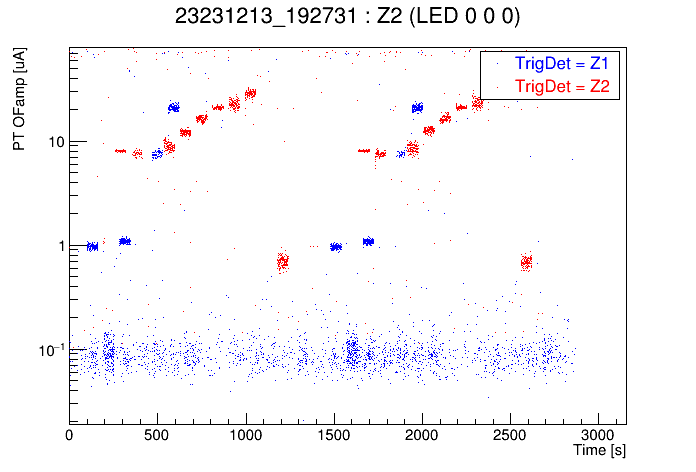

In [61]:
#gr_amp_t = rt.TGraph('gr_amp_t','gr_amp_t',0,10e3)
chan = 'PT'
key = 'LED'
det = 'Z2'
marker_color = [rt.kBlue, rt.kRed, rt.kBlack]
lname = ['TrigDet = Z1','TrigDet = Z2','TrigDet = Z3']
graphs = []
idx = 0
for i in range(1,4):
    mask = (TriggerType[idx] == 1) & (OFamps[series[key]][det][chan] > 0.) & (EventTime[idx] > 0.) & (TrigDet[idx] == i)
    if(np.sum(mask) == 0):
        continue
    t0 = EventTime[idx][mask][0]
    x = EventTime[idx][mask] - t0
    y = OFamps[series[key]][det][chan][mask]*1e6
    gr_amp_t = rt.TGraph(len(x),x,y)
    gr_amp_t.SetMarkerColor(marker_color[i-1])
    gr_amp_t.SetTitle('%s : %s (%s 0 0 0)'%(series[key],det,key) )
    gr_amp_t.GetXaxis().SetTitle('Time [s]')
    gr_amp_t.GetYaxis().SetTitle('PT OFamp [uA]')
    graphs.append(gr_amp_t)

l = rt.TLegend(0.69, 0.89, 0.89, 0.79) # x,y of top left and x,y of bottom right
#l = rt.TLegend(0.2, 0.75, 0.4, 0.85)
for i,gr in enumerate(graphs):
    ll = l.AddEntry(gr, lname[i], 'p')
    ll.SetTextColor(gr.GetMarkerColor())
    if(i==0):
        gr.GetXaxis().SetRangeUser(0,3500)
        
        gr.Draw('AP')
    else:
        gr.Draw('P same')
    
can.SetLogy()
l.Draw()
can.Draw()
# print(len(x))
# print(len(y))

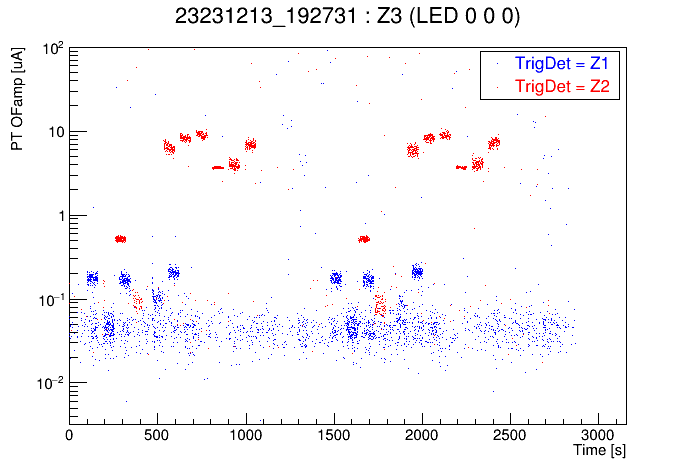

In [62]:
#gr_amp_t = rt.TGraph('gr_amp_t','gr_amp_t',0,10e3)
chan = 'PT'
key = 'LED'
det = 'Z3'
marker_color = [rt.kBlue, rt.kRed, rt.kBlack]
lname = ['TrigDet = Z1','TrigDet = Z2','TrigDet = Z3']
graphs = []
idx = 0
for i in range(1,4):
    mask = (TriggerType[idx] == 1) & (OFamps[series[key]][det][chan] > 0.) & (EventTime[idx] > 0.) & (TrigDet[idx] == i)
    if(np.sum(mask) == 0):
        continue
    t0 = EventTime[idx][mask][0]
    x = EventTime[idx][mask] - t0
    y = OFamps[series[key]][det][chan][mask]*1e6
    gr_amp_t = rt.TGraph(len(x),x,y)
    gr_amp_t.SetMarkerColor(marker_color[i-1])
    gr_amp_t.SetTitle('%s : %s (%s 0 0 0)'%(series[key],det,key) )
    gr_amp_t.GetXaxis().SetTitle('Time [s]')
    gr_amp_t.GetYaxis().SetTitle('PT OFamp [uA]')
    graphs.append(gr_amp_t)

l = rt.TLegend(0.69, 0.89, 0.89, 0.79) # x,y of top left and x,y of bottom right
#l = rt.TLegend(0.2, 0.75, 0.4, 0.85)
for i,gr in enumerate(graphs):
    ll = l.AddEntry(gr, lname[i], 'p')
    ll.SetTextColor(gr.GetMarkerColor())
    if(i==0):
        gr.GetXaxis().SetRangeUser(0,3500)
        
        gr.Draw('AP')
    else:
        gr.Draw('P same')
    
can.SetLogy()
l.Draw()
can.Draw()
# print(len(x))
# print(len(y))

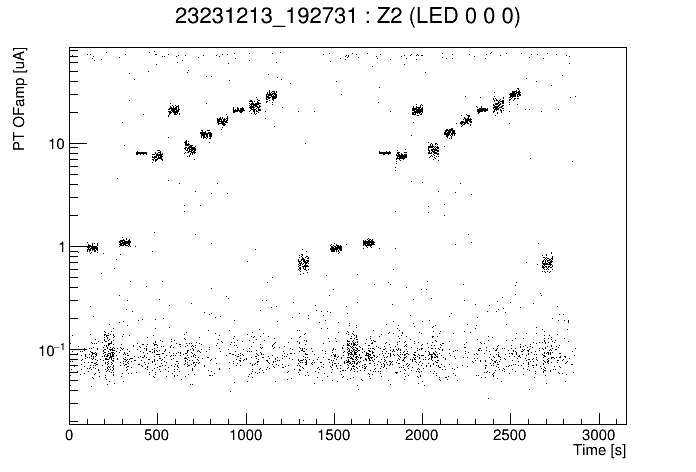

In [31]:
chan = 'PT'
key = 'LED'
det = 'Z2'
idx = 0
mask = (TriggerType[idx] == 1) & (OFamps[series[key]][det][chan] > 0.) & (EventTime[idx] > 0.)
t0 = EventTime[idx][mask][0]
#EventTime[0][mask] - t0

x = EventTime[idx][mask] - t0
y = OFamps[series[key]][det][chan][mask]*1e6
gr_amp_t = rt.TGraph(len(x),x,y)
gr_amp_t.SetTitle('%s : %s (%s 0 0 0)'%(series[key],det,key) )
gr_amp_t.GetXaxis().SetTitle('Time [s]')
gr_amp_t.GetYaxis().SetTitle('PT OFamp [uA]')
gr_amp_t.Draw('AP')
can.SetLogy()
can.Draw()

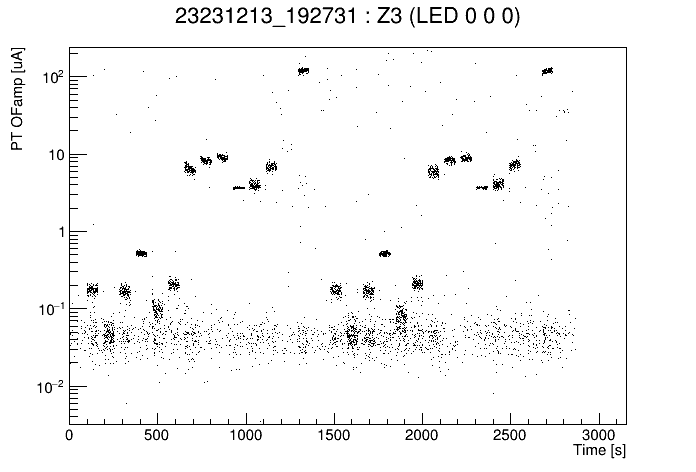

In [32]:
chan = 'PT'
key = 'LED'
det = 'Z3'
idx = 0
mask = (TriggerType[idx] == 1) & (OFamps[series[key]][det][chan] > 0.) & (EventTime[idx] > 0.)
t0 = EventTime[idx][mask][0]
#EventTime[0][mask] - t0

x = EventTime[idx][mask] - t0
y = OFamps[series[key]][det][chan][mask]*1e6
gr_amp_t = rt.TGraph(len(x),x,y)
gr_amp_t.SetTitle('%s : %s (%s 0 0 0)'%(series[key],det,key) )
gr_amp_t.GetXaxis().SetTitle('Time [s]')
gr_amp_t.GetYaxis().SetTitle('PT OFamp [uA]')
gr_amp_t.Draw('AP')
can.SetLogy()
can.Draw()

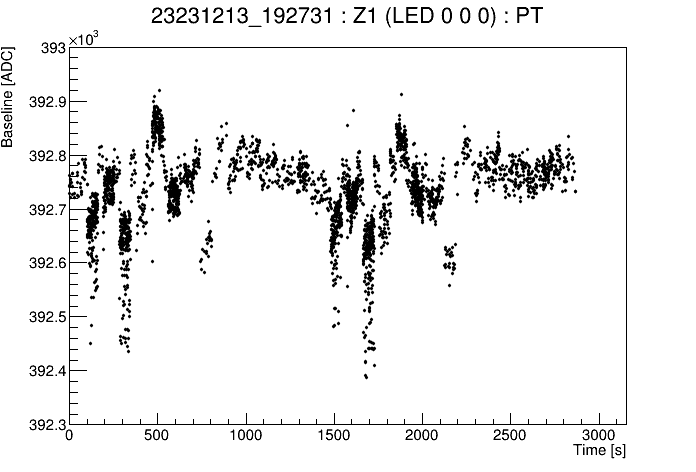

In [66]:
chan = 'PT'
key = 'LED'
det = 'Z1'
idx = 0
mask = (TriggerType[idx] == 1) & (OFamps[series[key]][det][chan] > 0.) & (EventTime[idx] > 0.) & (TrigDet[idx] == 1)
t0 = EventTime[idx][mask][0]
#EventTime[0][mask] - t0

x = EventTime[idx][mask] - t0
y = bs[series[key]][det][chan][mask]
gr_bs_t = rt.TGraph(len(x),x,y)
gr_bs_t.SetTitle('%s : %s (%s 0 0 0) : %s'%(series[key],det,key,chan) )
gr_bs_t.GetXaxis().SetTitle('Time [s]')
gr_bs_t.GetYaxis().SetTitle('Baseline [ADC]')
gr_bs_t.GetYaxis().SetRangeUser(392.3e3,393e3)
gr_bs_t.SetMarkerStyle(mstyle)
gr_bs_t.SetMarkerSize(msize)
gr_bs_t.Draw('AP')
can.SetLogy(0)
can.Draw()

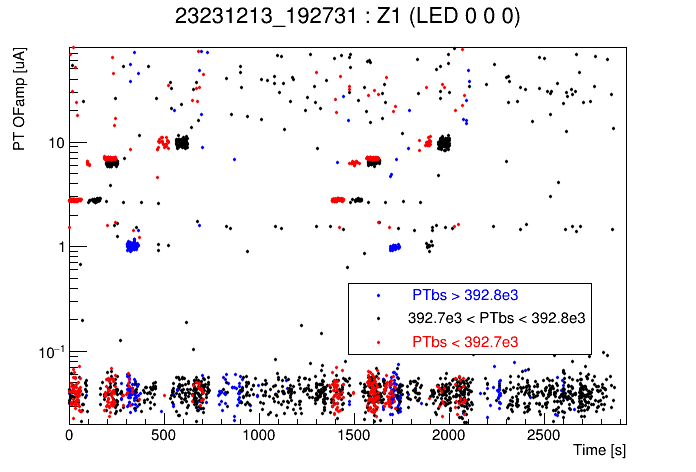

In [64]:
chan = 'PT'
key = 'LED'
det = 'Z1'
mstyle = rt.kFullCircle
msize = 0.4
idx = 0
mask = (TriggerType[idx] == 1) & (OFamps[series[key]][det][chan] > 0.) & (EventTime[idx] > 0.) & (TrigDet[idx] == 1) & (bs[series[key]][det][chan] > 392.8e3)
t0 = EventTime[idx][mask][0]
#EventTime[0][mask] - t0

x = EventTime[idx][mask] - t0
y = OFamps[series[key]][det][chan][mask]*1e6
gr_amp_t_1 = rt.TGraph(len(x),x,y)
gr_amp_t_1.SetTitle('%s : %s (%s 0 0 0)'%(series[key],det,key) )
gr_amp_t_1.GetXaxis().SetTitle('Time [s]')
gr_amp_t_1.GetYaxis().SetTitle('PT OFamp [uA]')
gr_amp_t_1.SetMarkerColor(rt.kBlue)
gr_amp_t_1.SetMarkerStyle(mstyle)
gr_amp_t_1.SetMarkerSize(msize)

mask = (TriggerType[idx] == 1) & (OFamps[series[key]][det][chan] > 0.) & (EventTime[idx] > 0.) & (TrigDet[idx] == 1) & (bs[series[key]][det][chan] < 392.8e3) & (bs[series[key]][det][chan] > 392.7e3)
t0 = EventTime[idx][mask][0]
#EventTime[0][mask] - t0

x = EventTime[idx][mask] - t0
y = OFamps[series[key]][det][chan][mask]*1e6
gr_amp_t_2 = rt.TGraph(len(x),x,y)
gr_amp_t_2.SetTitle('%s : %s (%s 0 0 0)'%(series[key],det,key) )
gr_amp_t_2.GetXaxis().SetTitle('Time [s]')
gr_amp_t_2.GetYaxis().SetTitle('PT OFamp [uA]')
gr_amp_t_2.SetMarkerColor(rt.kBlack)
gr_amp_t_2.SetMarkerStyle(mstyle)
gr_amp_t_2.SetMarkerSize(msize)

mask = (TriggerType[idx] == 1) & (OFamps[series[key]][det][chan] > 0.) & (EventTime[idx] > 0.) & (TrigDet[idx] == 1) & (bs[series[key]][det][chan] < 392.7e3)
t0 = EventTime[idx][mask][0]
#EventTime[0][mask] - t0

x = EventTime[idx][mask] - t0
y = OFamps[series[key]][det][chan][mask]*1e6
gr_amp_t_3 = rt.TGraph(len(x),x,y)
gr_amp_t_3.SetTitle('%s : %s (%s 0 0 0)'%(series[key],det,key) )
gr_amp_t_3.GetXaxis().SetTitle('Time [s]')
gr_amp_t_3.GetYaxis().SetTitle('PT OFamp [uA]')
gr_amp_t_3.SetMarkerColor(rt.kRed)
gr_amp_t_3.SetMarkerStyle(mstyle)
gr_amp_t_3.SetMarkerSize(msize)



gr_amp_t_1.Draw('AP')
gr_amp_t_2.Draw('P same')
gr_amp_t_3.Draw('P same')

#l = rt.TLegend(0.5, 0.89, 0.85, 0.75)
l = rt.TLegend(0.5, 0.4, 0.85, 0.25)
l.SetTextSize(0.035)

l1 = l.AddEntry(gr_amp_t_1,' PTbs > 392.8e3','P')
l1.SetTextColor(gr_amp_t_1.GetMarkerColor())
l2 = l.AddEntry(gr_amp_t_2,'392.7e3 < PTbs < 392.8e3','P')
l2.SetTextColor(gr_amp_t_2.GetMarkerColor())
l3 = l.AddEntry(gr_amp_t_3,' PTbs < 392.7e3','P')
l3.SetTextColor(gr_amp_t_3.GetMarkerColor())
can.SetLogy()
l.Draw()
can.Draw()

13391
13391


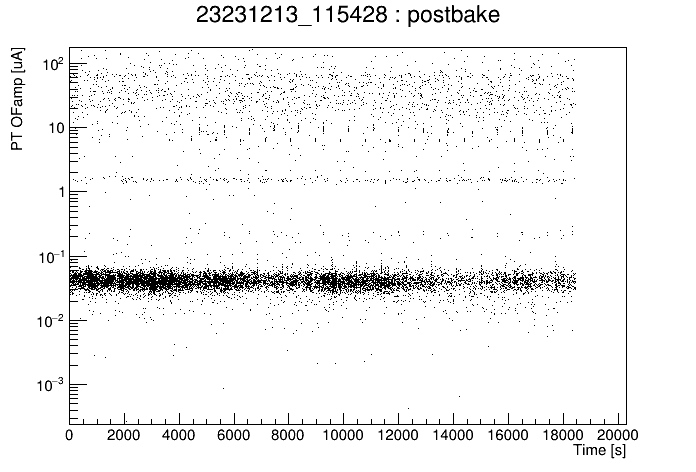

In [115]:
#gr_amp_t = rt.TGraph('gr_amp_t','gr_amp_t',0,10e3)
chan = 'PT'
key = 'postbake'
idx = 1
mask = (TriggerType[idx] == 1) & (OFamps[series[key]][chan] > 0.) & (EventTime[idx] > 0.)
t0 = EventTime[idx][mask][0]
#EventTime[0][mask] - t0

x = EventTime[idx][mask] - t0
y = OFamps[series[key]][chan][mask]*1e6
gr_amp_t = rt.TGraph(len(x),x,y)
gr_amp_t.SetTitle(series[key]+ ' : ' +key )
gr_amp_t.GetXaxis().SetTitle('Time [s]')
gr_amp_t.GetYaxis().SetTitle('PT OFamp [uA]')
gr_amp_t.Draw('AP')
can.SetLogy()
can.Draw()
print(len(x))
print(len(y))

In [66]:
c = 'PT'
dat = 'prebake'
mask = (TriggerType[0] == 1) & (OFamps[series[dat]][c] > 0.)
#h_chi2_ofamp_pt = rt.TH2F('h_chi2_ofamp_pt','\chi^2 \mbox{ vs. Amplitude};Amplitude (A);\chi^2',100,0, 2.5e-4,100,np.logspace(4.3, 8.4, 101))
h_chi2_ofamp_pt = rt.TH2F('h_chi2_ofamp_pt','\chi^2 \mbox{ vs. Amplitude} (%s);Amplitude (uA);\chi^2'%(dat),100,0, 10,100,np.logspace(4.3, 6, 101))
h_ofamp_pt = rt.TH1F('h_ofamp_pt','%s (chi2 < 5e4 & 1 < ofamp < 2 )'%(dat),200,0.5,2.5)
h_ofamp_pt.GetXaxis().SetTitle('PT OFAmps [uA]')
x = OFamps[series[dat]][c][mask]*1e6
y = OFchiq[series[dat]][c][mask]
for i in range(len(OFchiq[series[dat]][c][mask])):
    h_chi2_ofamp_pt.Fill(x[i],y[i])
    if((x[i] < 2) and (x[i] > 1) and (y[i] < 5e4)):
        h_ofamp_pt.Fill(x[i])
print('Done...')

Done...


<>:5: DeprecationWarning: invalid escape sequence \c
<>:5: DeprecationWarning: invalid escape sequence \c
<>:5: DeprecationWarning: invalid escape sequence \c
<ipython-input-66-e9035d618231>:5: DeprecationWarning: invalid escape sequence \c
  h_chi2_ofamp_pt = rt.TH2F('h_chi2_ofamp_pt','\chi^2 \mbox{ vs. Amplitude} (%s);Amplitude (uA);\chi^2'%(dat),100,0, 10,100,np.logspace(4.3, 6, 101))


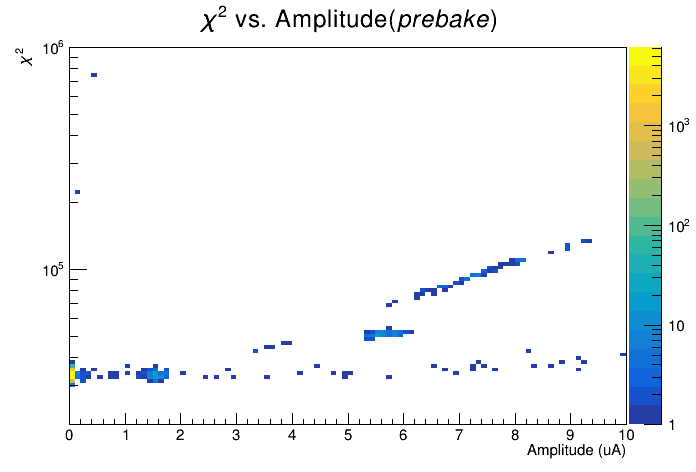

In [68]:
can = rt.TCanvas()
can.SetLogy()
rt.gStyle.SetOptStat(0)
can.SetLogz()
h_chi2_ofamp_pt.Draw('colz')
can.Draw()

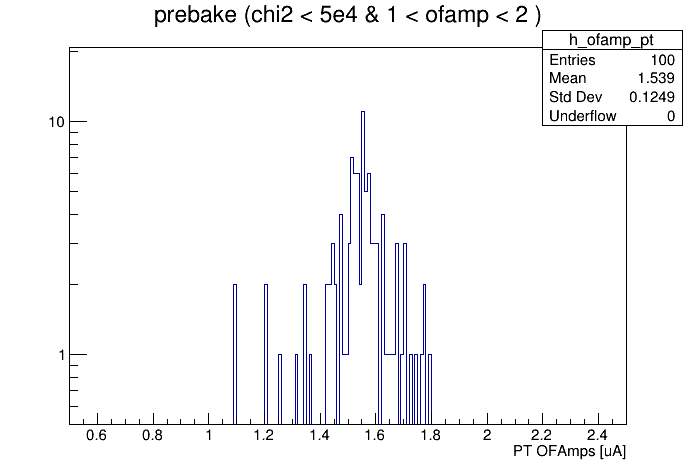

In [69]:
h_ofamp_pt.Draw()
rt.gStyle.SetOptStat(11111)
can.Draw()

In [27]:
h_ofamp_pt.GetEntries()

107.0

In [29]:
x[0:10]

array([2.87639633e-08, 4.78958130e-08, 6.06340127e-08, 3.29056191e-08,
       5.75420287e-08, 5.72963998e-08, 4.56184162e-08, 3.60516766e-08,
       4.02845714e-08, 5.95859903e-08])

In [13]:
#len(OFamps[series[dat]][c][mask])
len(OFchiq[series[dat]][c][mask])

12839

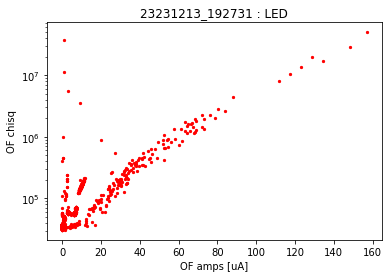

In [14]:
# Event selection
#Selecting saturated events
c = 'PT'
dat = 'LED'
mask = (TriggerType[0] == 1) & (OFamps[series[dat]][c] > 0.)
plt.scatter(OFamps[series[dat]][c][mask]*1e6,OFchiq[series[dat]][c][mask],s=5 ,color='r')

# plt.vlines(1.05,1e4,2e5)
# plt.vlines(2.3,1e4,2e5)
# plt.hlines(2e5,1.05,2.3)

# plt.xlim(0,10)
# plt.ylim(1e4,1e8)
plt.yscale("log")
plt.xlabel("OF amps [uA]")
plt.ylabel("OF chisq")
plt.title(series[dat]+ ' : ' + dat)
#plt.savefig("./plots/reverse_cal/OF_chi2_%s_scatter.png"%(c))
plt.show()

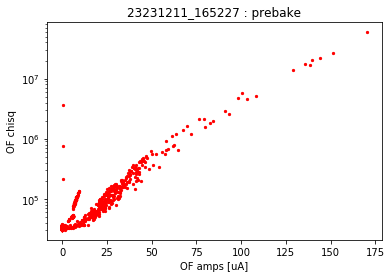

In [13]:
# Event selection
#Selecting saturated events
c = 'PT'
dat = 'prebake'
mask = (TriggerType[0] == 1) & (OFamps[series[dat]][c] > 0.)
plt.scatter(OFamps[series[dat]][c][mask]*1e6,OFchiq[series[dat]][c][mask],s=5 ,color='r')

# plt.vlines(1.05,1e4,2e5)
# plt.vlines(2.3,1e4,2e5)
# plt.hlines(2e5,1.05,2.3)

# plt.xlim(0,10)
# plt.ylim(1e4,1e8)
plt.yscale("log")
plt.xlabel("OF amps [uA]")
plt.ylabel("OF chisq")
plt.title(series[dat]+ ' : ' + dat)
#plt.savefig("./plots/reverse_cal/OF_chi2_%s_scatter.png"%(c))
plt.show()


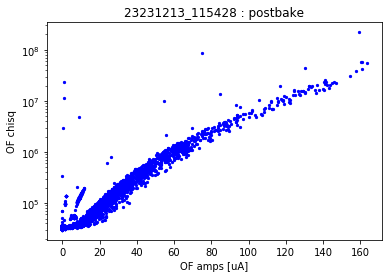

In [14]:
c = 'PT'
dat = 'postbake'
mask = (TriggerType[1] == 1) & (OFamps[series[dat]][c] > 0.)
plt.scatter(OFamps[series[dat]][c][mask]*1e6,OFchiq[series[dat]][c][mask],s=5 ,color='b')

# plt.vlines(1.05,1e4,2e5)
# plt.vlines(2.3,1e4,2e5)
# plt.hlines(2e5,1.05,2.3)

#plt.xlim(0,10)
#plt.ylim(1e4,1e8)
plt.yscale("log")
plt.xlabel("OF amps [uA]")
plt.ylabel("OF chisq")
plt.title(series[dat]+ ' : ' + dat)
#plt.savefig("./plots/reverse_cal/OF_chi2_%s_scatter.png"%(c))
plt.show()

In [82]:
c = 'PT'
dat = 'postbake'
mask = (TriggerType[1] == 1) & (OFamps[series[dat]][c] > 0.)
#h_chi2_ofamp_pt = rt.TH2F('h_chi2_ofamp_pt','\chi^2 \mbox{ vs. Amplitude};Amplitude (A);\chi^2',100,0, 2.5e-4,100,np.logspace(4.3, 8.4, 101))
h_chi2_ofamp_pt_post = rt.TH2F('h_chi2_ofamp_pt_post','\chi^2 \mbox{ vs. Amplitude} (%s);Amplitude (uA);\chi^2'%(dat),100,0, 10,100,np.logspace(4, 7, 101))
h_ofamp_pt_post = rt.TH1F('h_ofamp_pt_post','%s (chi2 < 5e4 & 1 < ofamp < 2 )'%(dat),200,0.5,2.5)
h_ofamp_pt_post.GetXaxis().SetTitle('PT OFAmps [uA]')
x = OFamps[series[dat]][c][mask]*1e6
y = OFchiq[series[dat]][c][mask]
for i in range(len(OFchiq[series[dat]][c][mask])):
    h_chi2_ofamp_pt_post.Fill(x[i],y[i])
    if((x[i] < 2) and (x[i] > 1) and (y[i] < 5e4)):
        h_ofamp_pt_post.Fill(x[i])
print('Done...')

Done...


<>:5: DeprecationWarning: invalid escape sequence \c
<>:5: DeprecationWarning: invalid escape sequence \c
<>:5: DeprecationWarning: invalid escape sequence \c
<ipython-input-82-929d0b625672>:5: DeprecationWarning: invalid escape sequence \c
  h_chi2_ofamp_pt_post = rt.TH2F('h_chi2_ofamp_pt_post','\chi^2 \mbox{ vs. Amplitude} (%s);Amplitude (uA);\chi^2'%(dat),100,0, 10,100,np.logspace(4, 7, 101))
Warning in <TROOT::Append>: Replacing existing TH1: h_chi2_ofamp_pt_post (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_ofamp_pt_post (Potential memory leak).


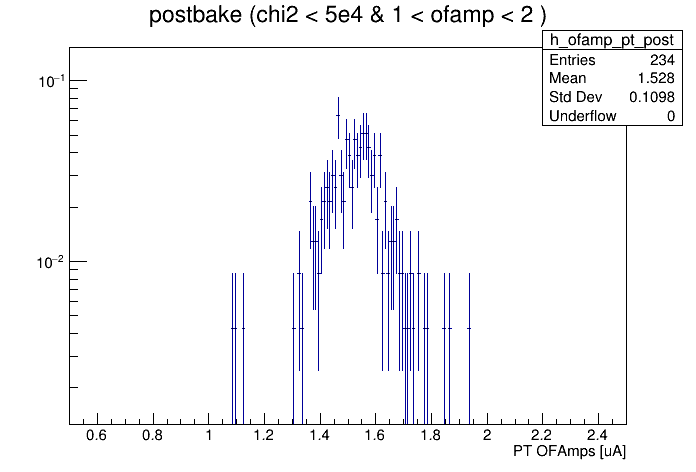

In [83]:
temp = h_ofamp_pt_post.Clone()
temp.Scale(1.0/temp.Integral())
temp.Draw()
can.Draw()

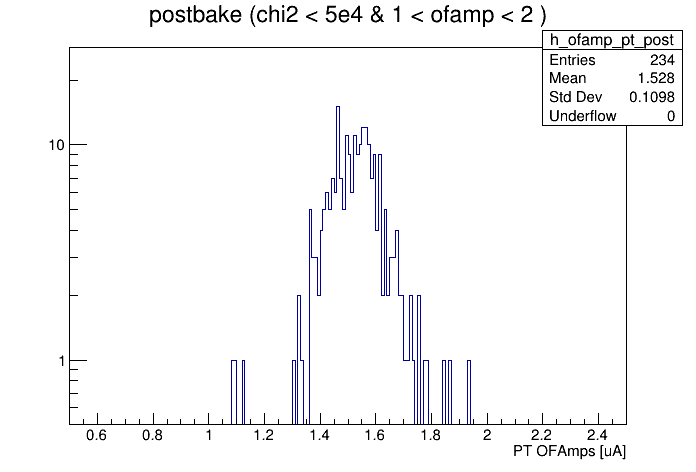

In [84]:
h_ofamp_pt_post.Draw()
can.Draw()

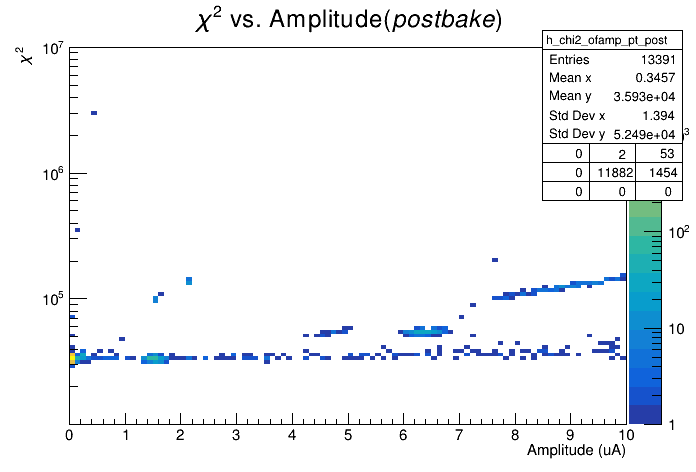

In [51]:
can = rt.TCanvas()
can.SetLogy()
#rt.gStyle.SetOptStat(0)
can.SetLogz()
h_chi2_ofamp_pt_post.Draw('colz')
can.Draw()

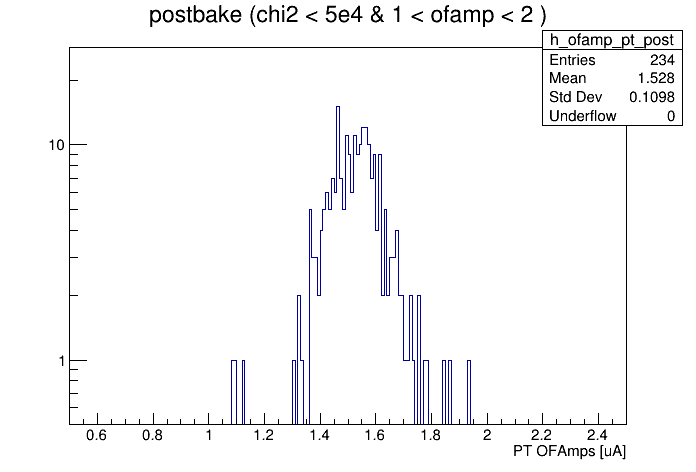

In [71]:
h_ofamp_pt_post.Draw()
can.Draw()

In [72]:
h_ofamp_pt.Scale(1./h_ofamp_pt.Integral())
h_ofamp_pt.Rebin(2)
h_ofamp_pt.SetLineColor(rt.kBlue)
h_ofamp_pt.SetLineStyle(1)
h_ofamp_pt.SetLineWidth(2)
h_ofamp_pt.SetTitle("")
h_ofamp_pt.GetYaxis().SetTitle('Normalized')

h_ofamp_pt_post.Scale(1./h_ofamp_pt_post.Integral())
h_ofamp_pt_post.Rebin(2)
h_ofamp_pt_post.SetLineColor(rt.kRed)
h_ofamp_pt_post.SetLineStyle(1)
h_ofamp_pt_post.SetLineWidth(2)
h_ofamp_pt_post.SetTitle("")
h_ofamp_pt_post.GetYaxis().SetTitle('Normalized')


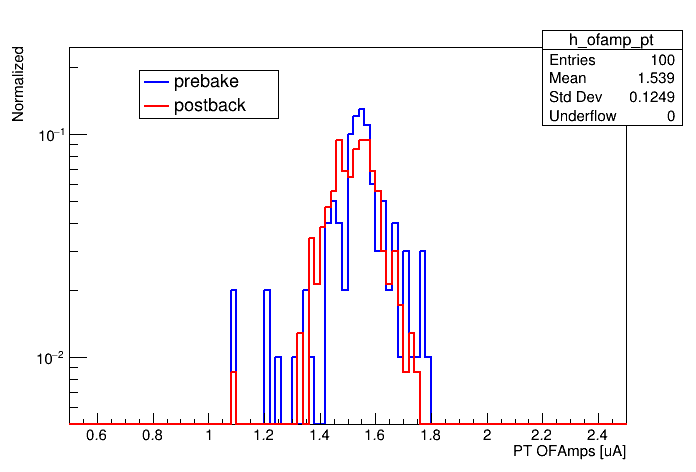

In [74]:
h_ofamp_pt.Draw('hist')
h_ofamp_pt_post.Draw('hist same')

l = rt.TLegend(0.2, 0.75, 0.4, 0.85) # x,y of top left and x,y of bottom right
l.AddEntry(h_ofamp_pt, "prebake", "l") # "l" to say it's just a line, no points
l.AddEntry(h_ofamp_pt_post, "postback", "l")

l.Draw()
can.Draw()